In [ ]:
"""
This code was created for thesis,
by Yudha Putra Arisandy
Departement of Computer Science
IPB University
"""

#1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Data Pre-Riset.xlsx', sheet_name='main')
#print(df.head(5))
#print(df.isnull().sum())
df.describe().transpose()

In [ ]:
df = df.drop('Panjang Gelombang (nm)',axis=1)
df = df.drop('N',axis=1)
df = df.drop('P',axis=1)

X = df.drop('N',axis=1)
y = df['N']

#split into 70:30 ration
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
df.shape

In [ ]:
# Preprocessing Random Oversampling
# SMOGN
!pip install smogn

# load libraries
import smogn
import pandas
## conduct smogn
df_smogn = smogn.smoter(
    
    ## main arguments
    data = df,           ## pandas dataframe
    y = 'K',          ## string ('header name')
    k = 9,                    ## positive integer (k < n) , 9, 12
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 0.99,         ## positive real number (0 < R < 1), 0.99
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 0.9           ## positive real number (0 < R), 0.9, 3.6
)
df_smogn.to_csv('df_smogn_k.csv')
df_smogn.shape

In [ ]:
X = df_smogn.drop('N',axis=1)
y = df_smogn['N']

In [ ]:
#read df_smogn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('df_smogn_n.csv')
#print(df.head(5))
#print(df.isnull().sum())
df = df.drop('Unnamed: 0',axis=1)
df.describe().transpose()
X = df.drop('N',axis=1)
y = df['N']

In [ ]:
#Preprocessing: Principal Component Analysis (PCA)
# calculate matriks covariance
features = X.T
cov_matrix = np.cov(features)
cov_matrix[:5]

#Eigen Decomposition
values, vectors = np.linalg.eig(cov_matrix)
values=values.real
vectors=vectors.real
values[:5]

explained_variances = []
for i in range(len(values)):
 explained_variances.append(values[i] / np.sum(values))
print(np.sum(explained_variances), '\n', explained_variances)

projected_1 = X.dot(vectors.T[0])
projected_2 = X.dot(vectors.T[1])
projected_3 = X.dot(vectors.T[2])
projected_4 = X.dot(vectors.T[3])
projected_5 = X.dot(vectors.T[4])
projected_6 = X.dot(vectors.T[5])
projected_7 = X.dot(vectors.T[6])
projected_8 = X.dot(vectors.T[7])
projected_9 = X.dot(vectors.T[8])
projected_10 = X.dot(vectors.T[9])
df_pca = pd.DataFrame(projected_1, columns=['PC1'])
df_pca['PC2'] = projected_2
df_pca['PC3'] = projected_3
df_pca['PC4'] = projected_4
df_pca['PC5'] = projected_5
df_pca['PC6'] = projected_6
df_pca['PC7'] = projected_7
df_pca['PC8'] = projected_8
df_pca['PC9'] = projected_9
df_pca['PC10'] = projected_10
df_pca['N'] = y
df_pca.to_csv('df_pca10_n.csv')
df_pca

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(df_pca['PC1'], [0] * len(df_pca), hue=df_pca['K'], s=200)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Variable to save the result in .csv
pc='raw'
unsur='k'

#df_pca = pd.read_csv('df_pca10_k.csv')
#df_pca = pd.read_excel('df_smogn_p.xlsx')
#df_pca = pd.read_csv('df_smogn_k.csv')
df_pca = pd.read_excel('df_raw_k.xlsx')
#df_pca.drop('Unnamed: 0', axis=1, inplace=True)
df_pca.head(5)

from sklearn.model_selection import train_test_split
X = df_pca.drop('K',axis=1)
y = df_pca['K']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A127,A128,A129,A130,A131,A132,A133,A134,A135,A136
10,28.114081,29.361163,30.884066,32.699464,33.876546,33.356672,31.483338,29.696028,28.869327,28.822636,...,20.342996,20.793190,21.211703,21.415654,21.433938,21.368281,21.283481,21.207955,21.129872,21.024427
28,42.394687,44.031993,45.947607,48.618066,50.523599,49.695784,46.729314,43.990654,42.744388,42.634062,...,29.483534,30.000390,30.457047,30.626230,30.540834,30.340359,30.145099,29.999475,29.852202,29.673577
22,34.772402,36.488100,38.457888,41.044776,42.946839,42.449510,40.187155,38.320790,37.730555,37.736337,...,27.690870,28.026678,28.459668,28.664403,28.629969,28.478459,28.313935,28.186879,28.052436,27.858059
31,69.287004,71.848785,74.971332,79.392804,82.630211,81.463206,76.750560,72.265357,70.133068,69.897027,...,51.382490,52.186440,52.902367,53.257659,53.341490,53.245672,53.001058,52.718671,52.490217,52.295635
38,49.234061,51.627546,54.345052,57.848022,60.354528,59.520826,56.150883,53.237958,52.190925,52.213019,...,40.786171,41.557619,42.405378,42.885599,43.005343,42.906346,42.700386,42.503897,42.346906,42.173458


In [ ]:
#1. Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
parameters={
    'n_estimators': [100, 200, 400, 600, 800, 1000], #200, 400, 600, 800, 1000
    'max_depth': [None, 10, 30, 50], #10, 30, 50
    'min_samples_split':[2, 5], #2, 5
    'min_samples_leaf': [1, 3], #1, 3
    'bootstrap': [False, True]
    }

rf = RandomForestRegressor()
regr_rf = GridSearchCV(rf, parameters)
regr_rf.fit(X_train, y_train)

y_pred = regr_rf.predict(X_test)

r2=regr_rf.best_score_
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mape=np.mean(np.abs((y_test - y_pred)/y_test))*100
nse=1-(np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_pred))**2))
akurasi=100-np.mean(np.abs((y_test - y_pred)/y_test))*100
best_estimator=regr_rf.best_estimator_
best_param= regr_rf.best_params_

print("Random Forest")
print('R2     :', r2)
print('RMSE   :', rmse)
print('MAPE   :', mape)
print('NSE    :', nse)
print('AKURASI:', akurasi)
print("\n Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", best_estimator)
print("\n The best parameters across ALL searched params:\n", best_param)

#Simpan semua hasil statistik dalam file csv
import csv  
header1 = ['R2', 'RMSE', 'MAPE', 'NSE', 'AKURASI', 'Best Estimator', 'Best Parameter']
data1 = [r2, rmse, mape, nse, akurasi, best_estimator, best_param]
header2 = ['y_test']
data2 = [y_test]
header3 = ['y_pred']
data3 = [y_pred]

model='rf'
nama_file='data_statistik' + '_' + model + '_' + pc + '_' + unsur + '.csv'

with open(nama_file, 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header1)
    writer.writerow(data1)
    writer.writerow("\n")
    writer.writerow(header2)
    writer.writerow(data2)
    writer.writerow("\n")
    writer.writerow(header3)
    writer.writerow(data3)

# Plot grafik regresi
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')

Gradient Boosting
R2     : 0.23669635600618633
RMSE   : 6.149393221801956
MAPE   : 11.313620259240494
NSE    : 0.12262152203518051
AKURASI: 88.6863797407595

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.3, n_estimators=7, subsample=0.7)

 The best parameters across ALL searched params:
 {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 7, 'subsample': 0.7}


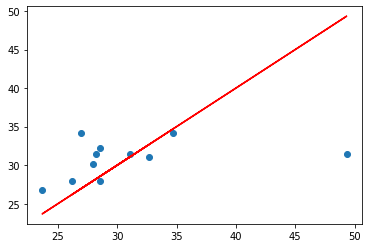

In [ ]:
#2. Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
parameters={
    'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 1.0], #0.0 - inf
    'n_estimators': [1, 3, 5, 7, 10, 15, 20, 100], #1 - inf
    'subsample':[0.1, 0.3, 0.5, 0.7, 1], #0-1
    'max_depth': [1, 3, 5, 7, 10, 15], #1-inf
    }
gb = GradientBoostingRegressor()
regr_gb = GridSearchCV(gb, parameters)
regr_gb.fit(X_train, y_train)

y_pred = regr_gb.predict(X_test)

r2=regr_gb.best_score_
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mape=np.mean(np.abs((y_test - y_pred)/y_test))*100
nse=1-(np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_pred))**2))
akurasi=100-np.mean(np.abs((y_test - y_pred)/y_test))*100
best_estimator=regr_gb.best_estimator_
best_param= regr_gb.best_params_

print("Gradient Boosting")
print('R2     :', r2)
print('RMSE   :', rmse)
print('MAPE   :', mape)
print('NSE    :', nse)
print('AKURASI:', akurasi)
print("\n Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", best_estimator)
print("\n The best parameters across ALL searched params:\n", best_param)

#Simpan semua hasil statistik dalam file csv
import csv  
header1 = ['R2', 'RMSE', 'MAPE', 'NSE', 'AKURASI', 'Best Estimator', 'Best Parameter']
data1 = [r2, rmse, mape, nse, akurasi, best_estimator, best_param]
header2 = ['y_test']
data2 = [y_test]
header3 = ['y_pred']
data3 = [y_pred]

model='gb'
nama_file='data_statistik' + '_' + model + '_' + pc + '_' + unsur + '.csv'

with open(nama_file, 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header1)
    writer.writerow(data1)
    writer.writerow("\n")
    writer.writerow(header2)
    writer.writerow(data2)
    writer.writerow("\n")
    writer.writerow(header3)
    writer.writerow(data3)

# Plot grafik regresi
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')

In [ ]:
#3 Support Vector Machine
from sklearn.svm import SVR
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
parameters={
    'C': [1.0, 2.0, 5.0, 7.0, 10.0], #positif
    'epsilon': [0.1, 0.3, 0.5, 0.7, 1.0],
    'gamma':['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
svr = SVR()
regr_svr = GridSearchCV(svr, parameters)
regr_svr.fit(X_train, y_train)

y_pred = regr_svr.predict(X_test)

r2=regr_svr.best_score_
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mape=np.mean(np.abs((y_test - y_pred)/y_test))*100
nse=1-(np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_pred))**2))
akurasi=100-np.mean(np.abs((y_test - y_pred)/y_test))*100
best_estimator=regr_svr.best_estimator_
best_param= regr_svr.best_params_

print("Support Vector Machine")
print('R2     :', r2)
print('RMSE   :', rmse)
print('MAPE   :', mape)
print('NSE    :', nse)
print('AKURASI:', akurasi)
print("\n Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", best_estimator)
print("\n The best parameters across ALL searched params:\n", best_param)

#Simpan semua hasil statistik dalam file csv
import csv  
header1 = ['R2', 'RMSE', 'MAPE', 'NSE', 'AKURASI', 'Best Estimator', 'Best Parameter']
data1 = [r2, rmse, mape, nse, akurasi, best_estimator, best_param]
header2 = ['y_test']
data2 = [y_test]
header3 = ['y_pred']
data3 = [y_pred]

model='svm'
nama_file='data_statistik' + '_' + model + '_' + pc + '_' + unsur + '.csv'

with open(nama_file, 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header1)
    writer.writerow(data1)
    writer.writerow("\n")
    writer.writerow(header2)
    writer.writerow(data2)
    writer.writerow("\n")
    writer.writerow(header3)
    writer.writerow(data3)

# Plot grafik regresi
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 37
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 39
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 36
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 38
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 39
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/s

Partial Least Square
R2     : -0.010940438848720601
RMSE   : 5.893168856443132
MAPE   : 11.624686443571187
NSE    : 0.19418055076128837
AKURASI: 88.37531355642881

 Results from Grid Search 

 The best estimator across ALL searched params:
 PLSRegression(max_iter=300, n_components=3)

 The best parameters across ALL searched params:
 {'max_iter': 300, 'n_components': 3}


/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 39
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 37
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 39
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 36
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 38
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/s

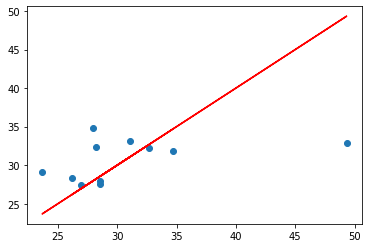

In [ ]:
#4. PLS
from sklearn.cross_decomposition import PLSRegression
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
parameters={
    'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40, 60, 80, 100, 120],
    'max_iter' : [300, 500, 1000]
    }
pls = PLSRegression()
regr_pls = GridSearchCV(pls, parameters)
regr_pls.fit(X_train, y_train)

y_pred = regr_pls.predict(X_test)

r2=regr_pls.best_score_
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mape=np.mean(np.abs((y_test.ravel() - y_pred.ravel())/y_test.ravel()))*100
nse=1-(np.sum((y_test.ravel()-y_pred.ravel())**2)/np.sum((y_test.ravel()-np.mean(y_pred.ravel()))**2))
akurasi=100-np.mean(np.abs((y_test.ravel() - y_pred.ravel())/y_test.ravel()))*100
best_estimator=regr_pls.best_estimator_
best_param= regr_pls.best_params_

print("Partial Least Square")
print('R2     :', r2)
print('RMSE   :', rmse)
print('MAPE   :', mape)
print('NSE    :', nse)
print('AKURASI:', akurasi)
print("\n Results from Grid Search ")
print("\n The best estimator across ALL searched params:\n", best_estimator)
print("\n The best parameters across ALL searched params:\n", best_param)

#Simpan semua hasil statistik dalam file csv
import csv  
header1 = ['R2', 'RMSE', 'MAPE', 'NSE', 'AKURASI', 'Best Estimator', 'Best Parameter']
data1 = [r2, rmse, mape, nse, akurasi, best_estimator, best_param]
header2 = ['y_test']
data2 = [y_test]
header3 = ['y_pred']
data3 = [y_pred]

model='pls'
nama_file='data_statistik' + '_' + model + '_' + pc + '_' + unsur + '.csv'

with open(nama_file, 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header1)
    writer.writerow(data1)
    writer.writerow("\n")
    writer.writerow(header2)
    writer.writerow(data2)
    writer.writerow("\n")
    writer.writerow(header3)
    writer.writerow(data3)

# Plot grafik regresi
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')

In [ ]:
#5. Deep Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import tensorflow.keras as keras

# deeper or wider
regr_dnn = Sequential()
regr_dnn.add(Dense(1024, input_dim=136, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(1024, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(512, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(512, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(512, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(256, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(256, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(256, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(128, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(128, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(128, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(64, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(64, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(64, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(32, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(32, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(32, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(16, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(16, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(16, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(8, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(8, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(8, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(4, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(4, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(4, kernel_initializer='normal', activation='relu'))
regr_dnn.add(Dense(1, kernel_initializer='normal'))
optimizer = keras.optimizers.Adam(learning_rate=0.00001)
regr_dnn.compile(optimizer=optimizer,loss='mse')

regr_dnn.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=8,epochs=1500)

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, mean_absolute_percentage_error
y_pred = regr_dnn.predict(X_test)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mape=np.mean(np.abs((y_test.ravel() - y_pred.ravel())/y_test.ravel()))*100
nse=1-(np.sum((y_test.ravel()-y_pred.ravel())**2)/np.sum((y_test.ravel()-np.mean(y_pred.ravel()))**2))
akurasi=100-np.mean(np.abs((y_test.ravel() - y_pred.ravel())/y_test.ravel()))*100

print("Deep Neural Network")
print('R2     :', r2)
print('RMSE   :', rmse)
print('MAPE   :', mape)
print('NSE    :', nse)
print('AKURASI:', akurasi)

#Simpan semua hasil statistik dalam file csv
import csv  
header1 = ['R2', 'RMSE', 'MAPE', 'NSE', 'AKURASI']
data1 = [r2, rmse, mape, nse, akurasi]
header2 = ['y_test']
data2 = [y_test]
header3 = ['y_pred']
data3 = [y_pred]

model='dnn'
nama_file='data_statistik' + '_' + model + '_' + pc + '_' + unsur + '.csv'

with open(nama_file, 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header1)
    writer.writerow(data1)
    writer.writerow("\n")
    writer.writerow(header2)
    writer.writerow(data2)
    writer.writerow("\n")
    writer.writerow(header3)
    writer.writerow(data3)

# Plot grafik regresi
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')